# ANN for regression, exercise project 1 - Diamonds

Ok let's try this again.<br>
I am not hoping for much since I just deleted a lot of information out of that dataset, but with it being more compressed, we can hopefully see at least a few improvements.

## Dependancies

In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

In [2]:
df = pd.read_csv("data/diamonds_optimized2.csv")

In [3]:
df.head()

,carat,cut,color,clarity,price
0,0.23,4,5,1,326
1,0.21,3,5,2,326
2,0.23,1,5,4,327
3,0.29,3,1,3,334
4,0.24,2,1,6,336


In [4]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
price      0
dtype: int64

## Creating the regression model

In [5]:
# printing out the column names for easier copying for X/y
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'price'], dtype='object')

In [6]:
# define independent variable
X = df.drop("price", axis=1)

# define dependant variable
y = df['price']

In [7]:
# unfortunately the scikit-learn's train_test_split doesn't support validation
# set split in itself.
# if you want to split the test set into two for a validation set too, try this trick:

# first, train/test split => 70% for training, 30% for other purposes (temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# now, split the 30% for other purposes by 50% (resulting in 2 x 15%)
# so finally, we have:
# 70% for training
# 15% for testing
# 15% for validation
# => 70 + 15 +15 = 100%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [8]:
variable_amount = len(X.columns)

In [9]:
# just seeing how much data we have in each
print(f"Train data amount: {len(X_train)}")
print(f"Test data amount: {len(X_test)}")
print(f"Validation data amount: {len(X_val)}")

Train data amount: 14999
Test data amount: 3215
Validation data amount: 3214


### First Model

First, let's just try to stick to layers with a high node count.

In [10]:
# Define Sequential neural network model
# modify the input shape to match your training column count
# remember, one of the columns is removed from training columns
# to be the target value. so if your data originally had 10 columns
# the input shape is 9 ... (10 - 1 => 9)
# the input layer itself can have a different number of nodes
# Tip: have at least the same number of nodes as in the input shape
# output layer in regression is always 1 node without activation function
model = keras.Sequential(
    [
        layers.Dense(64, input_shape=(variable_amount,)),  # 1st layer with 64 neurons
        layers.Dense(128),  # 2nd layer with more neurons to learn complex patterns
        layers.Dense(64),  # 3rd layer reduces neuron count
        layers.Dense(1)  # Output layer for regression
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

c:\Users\Startklar\Documents\Study\Finnilandi\DeepLearning\DPierdiluca_DL-Repo\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 472437.6250 - val_loss: 171217.0469
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 146886.1875 - val_loss: 64753.1133
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 59001.4141 - val_loss: 33118.3633
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 30582.1367 - val_loss: 22537.0078
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22491.2461 - val_loss: 22935.0449
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23673.1211 - val_loss: 22353.7148
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23475.3164 - val_loss: 22187.6406
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 23119.8906 - val_loss: 22630.1113
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22731.6270 - val_loss: 23027.4160
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 23452.0723 - val_loss: 21999.0391
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4

<Axes: >

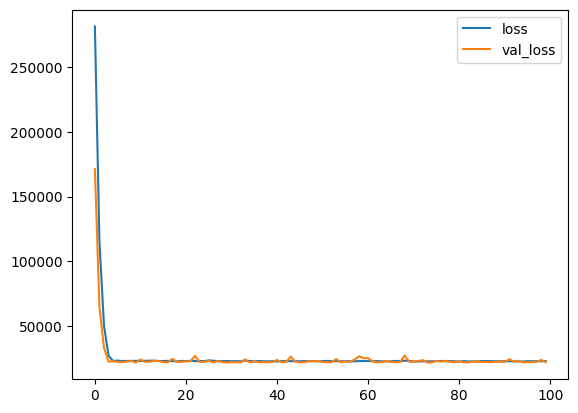

In [12]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

Seems to adjust quickly.

In [13]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
20587.693359375

Train data evaluation:
22488.8203125


These numbers could be better.

In [14]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Test True Y,Model Predictions
0,687,833.824768
1,1727,1584.449341
2,470,624.038757
3,1786,1589.376587
4,537,663.838562
...,...,...
3210,373,410.751892
3211,585,610.042175
3212,1286,1187.535767
3213,1298,1319.433716


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

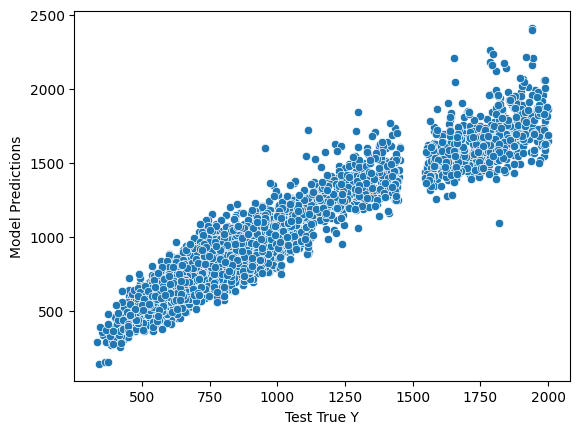

In [15]:
# these values follow a linear line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

Looks pretty good, though i seems there is a data gap at around 1500. These must have been outliers, that were deleted by RANSAC.

In [16]:
 # MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
115.84 $

MSE
20587.7 $^2

RMSE:
143.48 $

R-squared:
0.89

Explained variance score:
0.89


These are pretty good numbers.

C:\Users\Startklar\AppData\Local\Temp\ipykernel_15356\3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


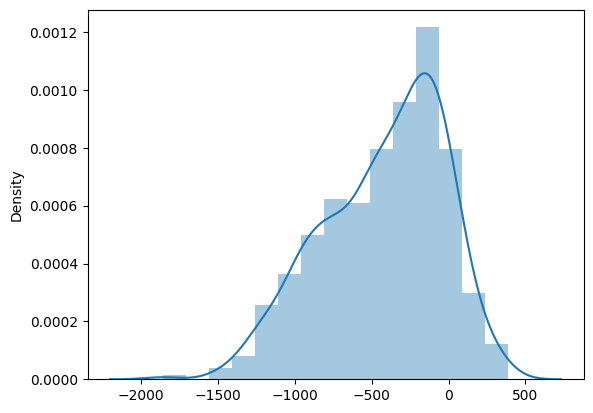

In [17]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

This looks like a pretty normal distribution. The model seems to be very prone to overpredicting. The undersampling we did seems to have destroyed the predictions.

In [18]:
df.head()

,carat,cut,color,clarity,price
0,0.23,4,5,1,326
1,0.21,3,5,2,326
2,0.23,1,5,4,327
3,0.29,3,1,3,334
4,0.24,2,1,6,336


In [19]:
# let's try with some new imaginary data
# this example uses the student performance index score dataset
# modify this as needed regarding your own dataset
tester_row = {
            'carat':    0.25,
            'cut' :      3,
            'color':      3,
            'clarity' :   4
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

To test how accurate the prediction is, I also put these stats into various online calculators:

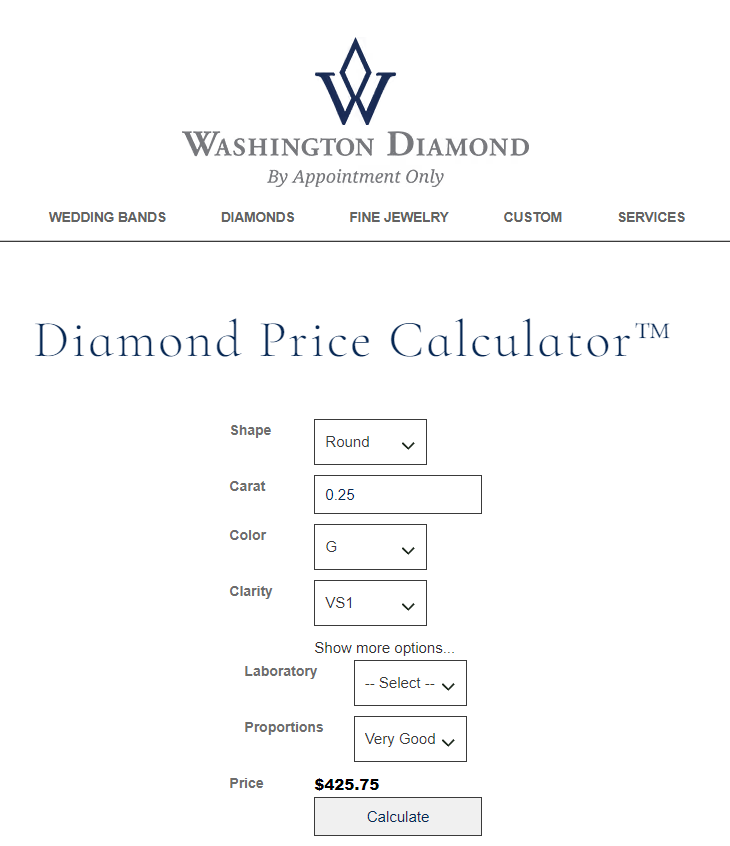

https://www.washingtondiamond.com/diamond-price-calculator

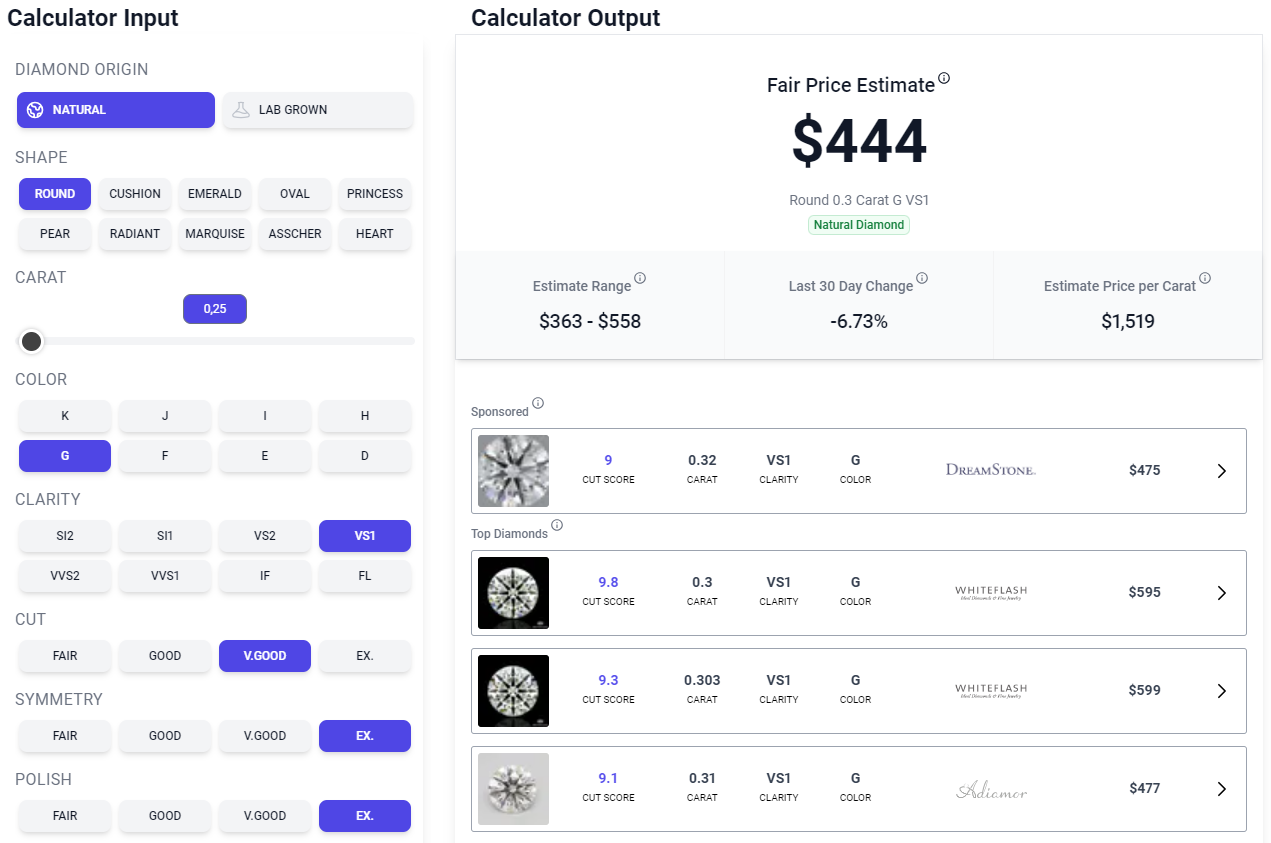

https://www.stonealgo.com/diamond-price-calculator/calc?a=1&b=0.3&c=5&d=4&e=3&f=4&g=4&h=5&i=0

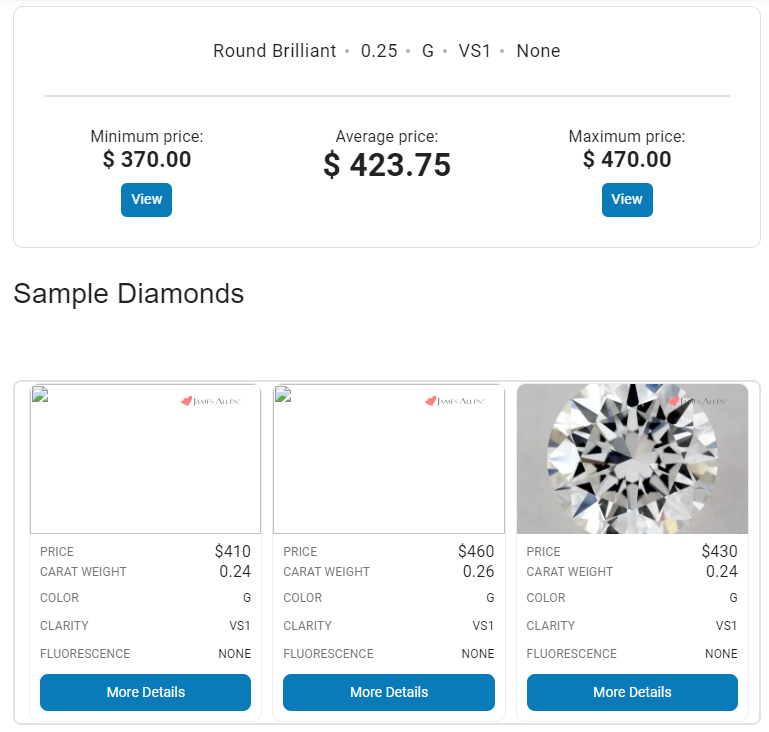

https://www.diamonds.pro/education/diamond-price-calculator/

I have also used these online tools to test if some prices of the diamonds from the dataset could be guessed correctly.<br>
And in many instances the online tools were able to guess very good, being only around 10% off of the actual prices. Which means these tools CAN be very accurate.

Which could suggest that the actual price of the sample diamond for the estimation would be around 430$.

In [20]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated price for this diamond:")
print(f"{round(float(result[0]), 2)} $")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

Estimated price for this diamond:
391.37 $
----------------


This is really close! But a bit too low.

In [21]:
len(y_test)

3215

### Second Model

Let's try the model that we previously deemed as the best.

In [22]:
# Define Sequential neural network model
# modify the input shape to match your training column count
# remember, one of the columns is removed from training columns
# to be the target value. so if your data originally had 10 columns
# the input shape is 9 ... (10 - 1 => 9)
# the input layer itself can have a different number of nodes
# Tip: have at least the same number of nodes as in the input shape
# output layer in regression is always 1 node without activation function
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 1st layer with 64 neurons
        layers.Dropout(0.1),  # Add dropout to avoid overfitting
        layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 2nd layer with more neurons to learn complex patterns
        layers.Dropout(0.1),  # Dropout again
        layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 3rd layer reduces neuron count
        layers.Dense(1)  # Output layer for regression
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

c:\Users\Startklar\Documents\Study\Finnilandi\DeepLearning\DPierdiluca_DL-Repo\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,977 (66.32 KB)

 Trainable params: 16,969 (66.29 KB)

 Non-trainable params: 8 (32.00 B)

In [23]:
model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 633313.5000 - val_loss: 47109.8359
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 45006.4492 - val_loss: 24832.9512
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 34641.7656 - val_loss: 22380.9453
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 31708.5664 - val_loss: 20662.8418
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32359.6582 - val_loss: 20425.1035
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 31660.6953 - val_loss: 19218.8574
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 30016.0527 - val_loss: 18596.5117
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 30089.6523 - val_loss: 19148.8770
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 28695.2812 - val_loss: 18151.5039
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 30588.1758 - val_loss: 18109.9785
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms

<Axes: >

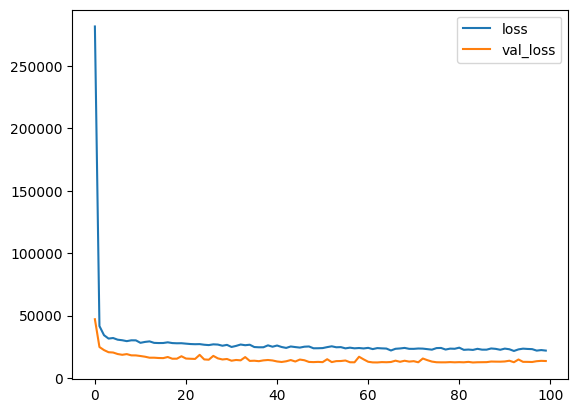

In [24]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

Since validation loss is above the training loss, this could suggest that this model has a lot of overfitting.

In [25]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
12847.5517578125

Train data evaluation:
13264.5390625


These are closer than before.

In [26]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Test True Y,Model Predictions
0,687,751.510010
1,1727,1641.622803
2,470,653.864563
3,1786,1653.732788
4,537,624.655518
...,...,...
3210,373,503.833008
3211,585,603.744812
3212,1286,1194.878662
3213,1298,1157.503662


Seems more accurate.

<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

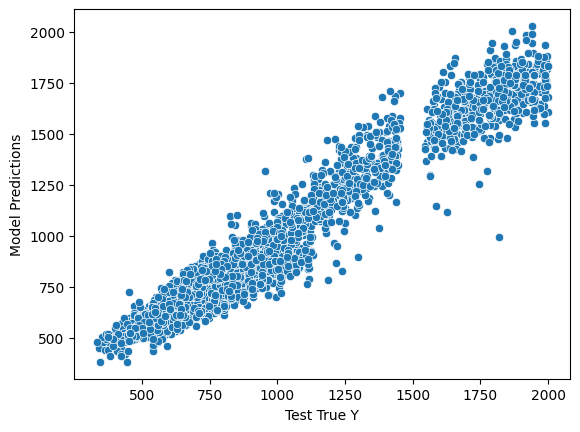

In [27]:
# these values follow a linear line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

Seems kinda samey as the one before.

In [28]:
 # MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
89.0 $

MSE
12716.51 $^2

RMSE:
112.77 $

R-squared:
0.93

Explained variance score:
0.94


The values are better than before.

C:\Users\Startklar\AppData\Local\Temp\ipykernel_15356\3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


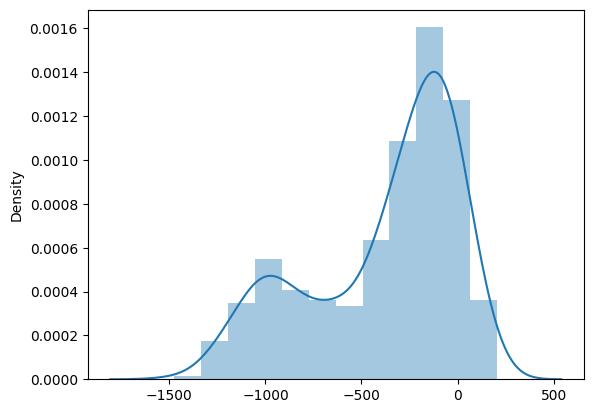

In [29]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

There's a few guesses that are overpredictions.

In [30]:
df.head()

,carat,cut,color,clarity,price
0,0.23,4,5,1,326
1,0.21,3,5,2,326
2,0.23,1,5,4,327
3,0.29,3,1,3,334
4,0.24,2,1,6,336


In [31]:
# let's try with some new imaginary data
# this example uses the student performance index score dataset
# modify this as needed regarding your own dataset
tester_row = {
            'carat':    0.25,
            'cut' :      3,
            'color':      3,
            'clarity' :   4
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [32]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated price for this diamond:")
print(f"{round(float(result[0]), 2)} $")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Estimated price for this diamond:
519.51 $
----------------


The guess is a bit more off than before, but that's still a pretty close guess!

In [33]:
len(y_test)

3215

## Conclusions

Seems this dataset is now more stable, and the model seems to be more reliable. Let's use this to create a UI.

## Steps to create the GUI

Let's first save the formula of the forward path from the second model.

In [38]:
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
import numpy as np
from tkinter import Tk, Label, Entry, Button


model.save('data/model/diamonds_model.keras')  # Save the model

Very simple UI, I know, but it works.

In [39]:
def predict_price():
    try:
        # Load the trained model
        loaded_model = tf.keras.models.load_model('data/model/diamonds_model.keras', custom_objects={'mse': MeanSquaredError()})
        
        # Get inputs from user
        try:
            carat = float(entry_carat.get())
            if carat <= 0:
                raise ValueError("Carat must be positive.")
        except ValueError as ve:
            result_label.config(text=f"Error: Invalid input for carat. {ve}")
            return

        try:
            cut = int(entry_cut.get())
            if cut < 1 or cut > 5:
                raise ValueError("Cut must be between 1 and 5.")
        except ValueError as ve:
            result_label.config(text=f"Error: Invalid input for cut. {ve}")
            return

        try:
            color = int(entry_color.get())
            if color < 1 or color > 7:
                raise ValueError("Color must be between 1 and 7.")
        except ValueError as ve:
            result_label.config(text=f"Error: Invalid input for color. {ve}")
            return

        try:
            clarity = int(entry_clarity.get())
            if clarity < 1 or clarity > 8:
                raise ValueError("Clarity must be between 1 and 8.")
        except ValueError as ve:
            result_label.config(text=f"Error: Invalid input for clarity. {ve}")
            return

        # Prepare input data
        input_data = np.array([[carat, cut, color, clarity]])  # Ensure input is a NumPy array

        # Make prediction
        prediction = loaded_model.predict(input_data)
        
        # Display result
        result_label.config(text=f"Predicted Price: {prediction[0][0]:.2f}")

    except Exception as e:
        result_label.config(text=f"Error: {e}")

# Set up the GUI
root = Tk()
root.title("Diamond Price Predictor")

# Input fields
Label(root, text="Carat:").grid(row=0, column=0)
entry_carat = Entry(root)
entry_carat.grid(row=0, column=1)

Label(root, text="Cut (1-5):").grid(row=1, column=0)
entry_cut = Entry(root)
entry_cut.grid(row=1, column=1)

Label(root, text="Color (1-7):").grid(row=2, column=0)
entry_color = Entry(root)
entry_color.grid(row=2, column=1)

Label(root, text="Clarity (1-8):").grid(row=3, column=0)
entry_clarity = Entry(root)
entry_clarity.grid(row=3, column=1)

# Prediction button
Button(root, text="Predict Price", command=predict_price).grid(row=4, column=0, columnspan=2)

# Result label
result_label = Label(root, text="")
result_label.grid(row=5, column=0, columnspan=2)

# Run the GUI
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
